In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt


In [ ]:
# Loading CIFAR-10 dataset
(resnet_training_images, resnet_training_labels), (resnet_test_images, resnet_test_labels) = cifar10.load_data()

# Preprocess input images
resnet_training_images = preprocess_input(resnet_training_images)
resnet_test_images = preprocess_input(resnet_test_images)

# Convert labels to one-hot encoded vectors
resnet_training_labels = tf.keras.utils.to_categorical(resnet_training_labels, num_classes=10)
resnet_test_labels = tf.keras.utils.to_categorical(resnet_test_labels, num_classes=10)

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# Define ResNet50 model
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

# Add new layers on top of ResNet50
x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Create final model
model = Model(inputs=resnet_model.input, outputs=predictions)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
# Compile model
model.compile( optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model
history = model.fit(resnet_training_images, resnet_training_labels, epochs= 25,
                    steps_per_epoch = 550, batch_size=32,
                    validation_steps = 1, validation_data=(resnet_test_images, resnet_test_labels))

Epoch 1/25
550/550 [==============================] - 1441s 3s/step - loss: 1.4904 - accuracy: 0.4953 - val_loss: 0.8666 - val_accuracy: 0.7188
Epoch 2/25
550/550 [==============================] - 1436s 3s/step - loss: 1.0027 - accuracy: 0.6568 - val_loss: 0.8527 - val_accuracy: 0.7812
Epoch 3/25
550/550 [==============================] - 1431s 3s/step - loss: 0.8677 - accuracy: 0.7046 - val_loss: 0.8644 - val_accuracy: 0.8125
Epoch 4/25
550/550 [==============================] - 1434s 3s/step - loss: 0.6984 - accuracy: 0.7631 - val_loss: 0.5629 - val_accuracy: 0.7812
Epoch 5/25
550/550 [==============================] - 1440s 3s/step - loss: 0.6857 - accuracy: 0.7691 - val_loss: 0.6525 - val_accuracy: 0.7812
Epoch 6/25
550/550 [==============================] - 1438s 3s/step - loss: 0.6162 - accuracy: 0.7913 - val_loss: 0.4616 - val_accuracy: 0.8750
Epoch 7/25
550/550 [==============================] - 1441s 3s/step - loss: 0.5609 - accuracy: 0.8067 - val_loss: 0.4005 - val_accuracy:

In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(resnet_test_images, resnet_test_labels)

313/313 [==============================] - 34s 110ms/step - loss: 0.7575 - accuracy: 0.8049


In [ ]:
# Print classification accuracy
print('Test accuracy:', test_acc)

Test accuracy: 0.8048999905586243


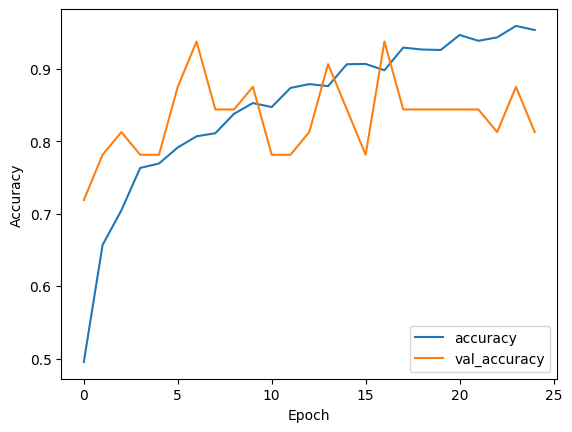

In [ ]:
#Visualising the performance

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc ='lower right')